<a href="https://colab.research.google.com/github/scapolingua/Deep-Learning/blob/master/Xgbost_su_ConsumiElettrodomestici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

         Data    Ora  Frigorifero  Lavatrice  Lavastoviglie  TelevisoreSala  \
0  01-01-2023  00:00         0.92        0.0            0.0            0.14   
1  01-01-2023  00:10         0.65        0.0            0.0            0.16   
2  01-01-2023  00:20         0.89        0.0            0.0            0.10   
3  01-01-2023  00:30         0.76        0.0            0.0            0.28   
4  01-01-2023  00:40         0.96        0.0            0.0            0.19   

   LuciCucina  LuciCameradaLetto1  LuciCameradaLetto2  LuciBagno  \
0         0.0                 0.0                 0.0        0.0   
1         0.0                 0.0                 0.0        0.0   
2         0.0                 0.0                 0.0        0.0   
3         0.0                 0.0                 0.0        0.0   
4         0.0                 0.0                 0.0        0.0   

   LuciSoggiorno  TelevisoreCameradaLetto  FornoaMicroonde  Forno  \
0            0.0                      0.0      

<ipython-input-16-d04c9b6916f7>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ora'] =  pd.to_datetime(df['Ora'])


Mean Squared Error (MSE): 0.00
R2 Score: 1.00


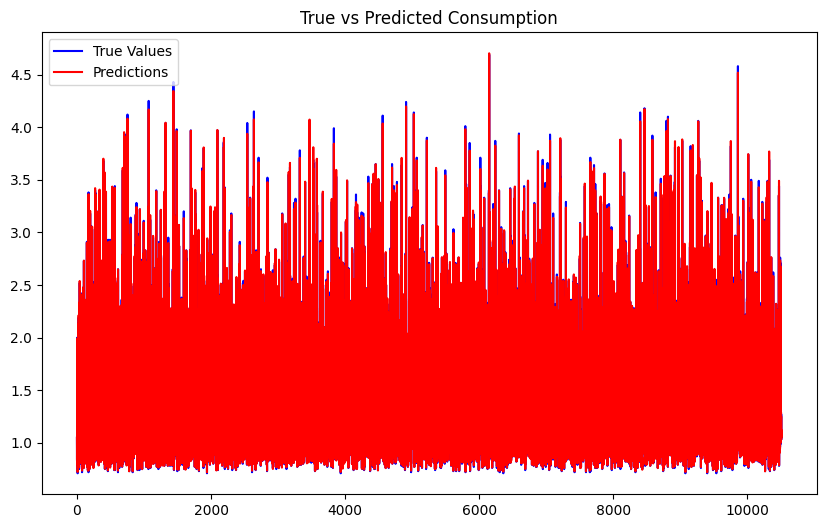

       Valori Reali  Valori Previsti
44380          1.05         1.044571
20192          0.83         0.839226
4070           1.04         1.040281
26848          0.94         0.950679
48569          1.08         1.072677
...             ...              ...
13608          1.03         1.030686
24652          1.12         1.123807
15985          1.05         1.053407
44356          1.05         1.062701
2824           1.09         1.091895

[10512 rows x 2 columns]


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import joblib # Import joblib for saving and loading the model

# 1. Caricamento del file CSV
file_path = "consumi_elettrodomestici_2023.csv"
df = pd.read_csv(file_path,sep=';')

# 2. Esplorazione iniziale dei dati
print(df.head())
print(df.info())

# 3. Pre-elaborazione dei dati
# Convertiamo il timestamp in datetime e aggiungiamo feature temporali

df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y')
df['Ora'] =  pd.to_datetime(df['Ora'])

# Extract temporal features and assign them to new columns
df['Ora'] = df['Ora'].dt.hour
df['day'] = df['Data'].dt.day # Extract day and store it in a new 'day' column
df['month'] = df['Data'].dt.month  # Extract month and store it in a new 'month' column
df['weekday'] = df['Data'].dt.weekday # Extract weekday and store it in a new 'weekday' column

# Rimuoviamo la colonna timestamp (non direttamente utile per il modello)
# Assuming 'timestamp' is either 'Data' or 'Ora' or a separate column
df = df.drop(columns=['Data','Ora']) # Drop Original 'Data' and 'Ora' columns as we have extracted necessary info.


# Separiamo i dati in feature (X) e target (y)
X = df.drop(columns=['TotaleConsumo'])  # Tutte le feature eccetto il target
# Ensure 'Data' is removed from features
X = X.select_dtypes(exclude=['datetime64[ns]']) #This line is added to remove the 'Data' column from X if it's present
y = df['TotaleConsumo']  # Target

# 4. Divisione in dati di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Creazione del modello XGBoost
model = XGBRegressor(
    n_estimators=100,  # Numero di alberi
    learning_rate=0.1,  # Tasso di apprendimento
    max_depth=6,  # Profondità massima degli alberi
    random_state=42
)

# 6. Addestramento del modello
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'xgboost_model.pkl') # Save the model to a file named 'xgboost_model.pkl'

# 7. Previsione sui dati di test
y_pred = model.predict(X_test)

# 8. Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 9. Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label="True Values", color='blue')
plt.plot(range(len(y_test)), y_pred, label="Predictions", color='red')
plt.legend()
plt.title("True vs Predicted Consumption")
plt.show()

# 10. Create a comparison table
comparison_df = pd.DataFrame({'Valori Reali': y_test, 'Valori Previsti': y_pred})

# Display the comparison table
print(comparison_df)


# --- Example of loading and using the saved model ---
# Load the saved model
#loaded_model = joblib.load('xgboost_model.pkl')

# Prepare new data for prediction (make sure it has the same features as the training data)
# new_data = pd.DataFrame(...) # Create a DataFrame with the new data

# Make predictions using the loaded model
# new_predictions = loaded_model.predict(new_data)
# print(new_predictions)

         Data    Ora  Frigorifero  Lavatrice  Lavastoviglie  TelevisoreSala  \
0  01-01-2023  00:00         0.92        0.0            0.0            0.14   
1  01-01-2023  00:10         0.65        0.0            0.0            0.16   
2  01-01-2023  00:20         0.89        0.0            0.0            0.10   
3  01-01-2023  00:30         0.76        0.0            0.0            0.28   
4  01-01-2023  00:40         0.96        0.0            0.0            0.19   

   LuciCucina  LuciCameradaLetto1  LuciCameradaLetto2  LuciBagno  \
0         0.0                 0.0                 0.0        0.0   
1         0.0                 0.0                 0.0        0.0   
2         0.0                 0.0                 0.0        0.0   
3         0.0                 0.0                 0.0        0.0   
4         0.0                 0.0                 0.0        0.0   

   LuciSoggiorno  TelevisoreCameradaLetto  FornoaMicroonde  Forno  \
0            0.0                      0.0      

<ipython-input-21-740f1a800760>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ora'] =  pd.to_datetime(df['Ora'])


[1.0672804 0.8143137 1.0051483 ... 1.8114105 1.0582013 1.0958315]
Mean Squared Error (MSE): 0.00
R2 Score: 1.00


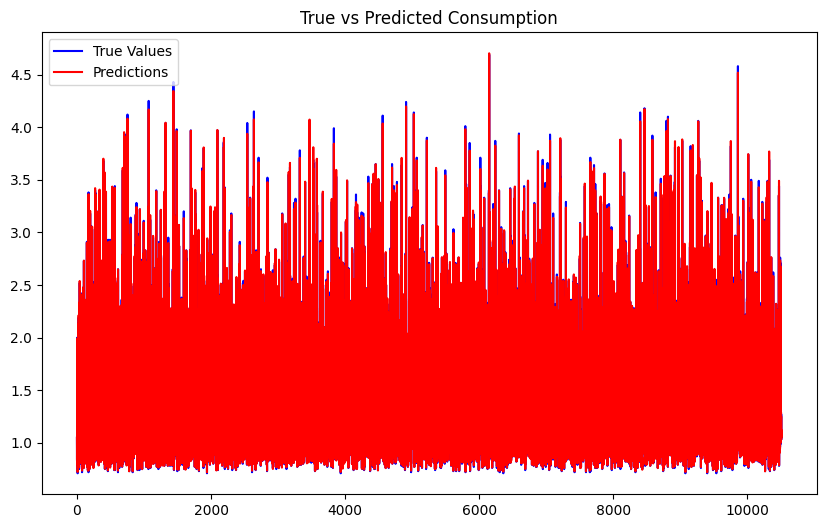

       Valori Reali  Valori Previsti
44380          1.05         1.044571
20192          0.83         0.839226
4070           1.04         1.040281
26848          0.94         0.950679
48569          1.08         1.072677
...             ...              ...
13608          1.03         1.030686
24652          1.12         1.123807
15985          1.05         1.053407
44356          1.05         1.062701
2824           1.09         1.091895

[10512 rows x 2 columns]


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import joblib # Import joblib for saving and loading the model

# 1. Caricamento del file CSV
file_path = "consumi_elettrodomestici_2023.csv"
df = pd.read_csv(file_path,sep=';')

# 2. Esplorazione iniziale dei dati
print(df.head())
print(df.info())

# 3. Pre-elaborazione dei dati
# Convertiamo il timestamp in datetime e aggiungiamo feature temporali

df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y')
df['Ora'] =  pd.to_datetime(df['Ora'])

# Extract temporal features and assign them to new columns
df['Ora'] = df['Ora'].dt.hour
df['day'] = df['Data'].dt.day # Extract day and store it in a new 'day' column
df['month'] = df['Data'].dt.month  # Extract month and store it in a new 'month' column
df['weekday'] = df['Data'].dt.weekday # Extract weekday and store it in a new 'weekday' column

# Rimuoviamo la colonna timestamp (non direttamente utile per il modello)
# Assuming 'timestamp' is either 'Data' or 'Ora' or a separate column
df = df.drop(columns=['Data','Ora']) # Drop Original 'Data' and 'Ora' columns as we have extracted necessary info.

# Separiamo i dati in feature (X) e target (y)
X = df.drop(columns=['TotaleConsumo'])  # Tutte le feature eccetto il target
# Ensure 'Data' is removed from features
X = X.select_dtypes(exclude=['datetime64[ns]']) #This line is added to remove the 'Data' column from X if it's present
y = df['TotaleConsumo']  # Target

# 4. Divisione in dati di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the saved model
model = joblib.load('xgboost_model.pkl')

# Use X for predictions, not df
predictions = model.predict(X)
print(predictions)

# 7. Previsione sui dati di test
y_pred = model.predict(X_test)

# 8. Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 9. Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label="True Values", color='blue')
plt.plot(range(len(y_test)), y_pred, label="Predictions", color='red')
plt.legend()
plt.title("True vs Predicted Consumption")
plt.show()

# 10. Create a comparison table
comparison_df = pd.DataFrame({'Valori Reali': y_test, 'Valori Previsti': y_pred})

# Display the comparison table
print(comparison_df)


